# Example 4.8

The code for the calculation made in Example 4.8.

Integral of p(x) from 6 to infinity:  6.144212353342837e-06


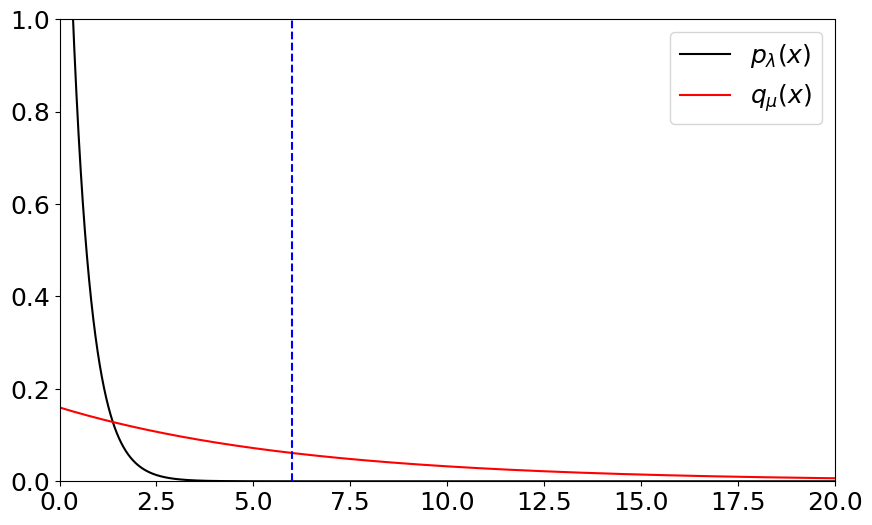

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def p(x, lam):
    return lam * np.exp(-lam * x)

def q(x, mu):
    return mu * np.exp(-mu * x)

def w(x, lam, mu):
    return p(x, lam)/q(x, mu)


lam = 2
K = 6

xx = np.linspace(0, 20, 100000)
# compute the integral of p(x) from 4 to infinity, note that xx starts at 0
I = 1 - (1 - np.exp(-lam * K))
print('Integral of p(x) from 6 to infinity: ', I)

N = 1000

mu = ((K * lam + 1) - np.sqrt(K**2 * lam**2 + 1))/K
# note mu above is simplified
# verify this is the same mu_star as in Ex. 4.8

fig = plt.figure(figsize=(10, 6))
# make the fonts bigger
plt.rcParams.update({'font.size': 18})
plt.plot(xx, p(xx, lam), 'k-', label='$p_{\lambda}(x)$')
plt.plot(xx, q(xx, mu), 'r-', label='$q_{\mu}(x)$')
# put a dashed line at 6
plt.plot([K, K], [0, 1], 'b--')
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.legend()
plt.show()

Let us now compute the variances as noted in the lecture and observe the variance reduction.

In [3]:
x = np.zeros(N)
weights = np.zeros(N)


for i in range(N):
    x[i] = np.random.exponential(1/mu)
    weights[i] = w(x[i], lam, mu)

x_iid = np.random.exponential(1/lam, N)

I_est_MC = (1/N) * np.sum(x_iid > K)

I_est_IS = (1/N) * np.sum(weights * (x > K))
print(I_est_IS)
print(I_est_MC)

var_MC = (I - I**2)/N
var_IS = (1/N) * ((lam**2 / (mu * (2 * lam - mu))) * np.exp(-(2*lam - mu) * K) - I**2)

print(var_MC)
print(var_IS)

5.501965735625081e-06
0.0
6.144174601997394e-09
6.041426598364779e-13


/var/folders/d8/86whr2t12h70n511w7s7cm_w0000gn/T/ipykernel_27561/2561906564.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.exponential(1/mu, 1)
